# Тестирование нахождения боксов алгоритмическим методом

В этом ноутбуке написан алгоритм для поиска боксов для labels, tikz и т.д.
Алгоритм основан на нахождении больших массивов пикселей одинакового цвета и проверки некоторых условий на эти массивы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
example_figure = plt.imread('figures/example_chart.png')

In [3]:
example_figure[:2]

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]]], dtype=float32)

(-0.5, 935.5, 519.5, -0.5)

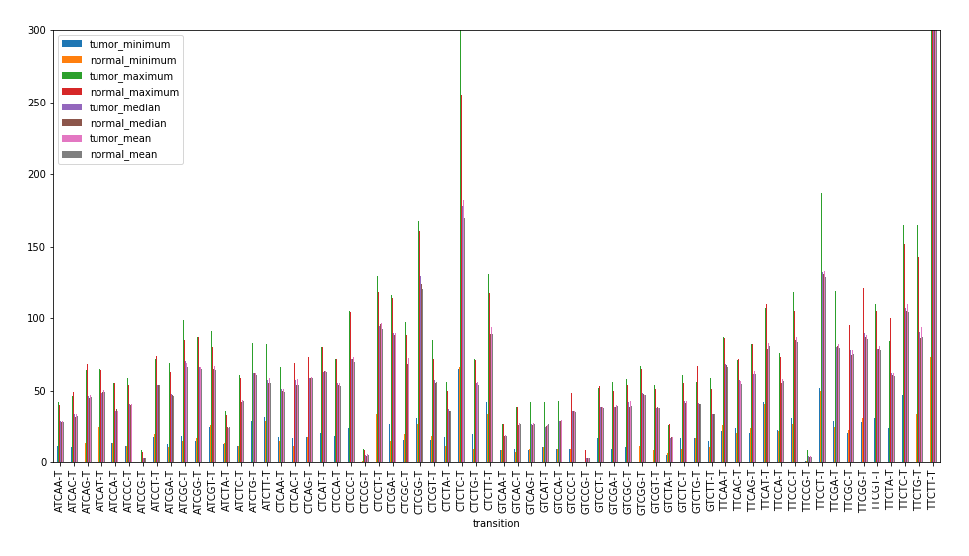

In [4]:
plt.figure(dpi=200)
plt.imshow(example_figure)
plt.axis('off')

In [5]:
example_figure.shape

(520, 936, 4)

In [6]:
blank_line_indexes = []
for i, row in enumerate(example_figure):
    unique_pixels = set([tuple(pixel) for pixel in row])
    if len(unique_pixels) == 1:
        blank_line_indexes.append(i)

In [7]:
def transform_indexes_to_segments(indexes):
    """
    indexes: list of list of int
    """
    segments = []

    for row_index in indexes:
        if not segments:
            segments.append([row_index, row_index + 1])
            continue

        if row_index == segments[-1][1]:
            segments[-1][1] += 1
        else:
            # segment is range
            segments[-1] = tuple(segments[-1])
            segments.append([row_index, row_index + 1])
    
    return segments

In [8]:
blank_line_segments = transform_indexes_to_segments(blank_line_indexes)
blank_line_segments

[(0, 7), (451, 453), (500, 503), [511, 520]]

In [9]:
def create_content_segments_from_blank_segments(blank_line_segments, max_length):
    content_segments = []

    if blank_line_segments[0][0] != 0:
        content_segments.append((0, blank_line_segments[0][0]))

    for i, segment in enumerate(blank_line_segments):
        if i == 0 and segment[0] != 0:
            content_segments.append((0, segment[0]))
        elif i == len(blank_line_segments) - 1:
            if segment[1] != example_figure.shape[0]:
                content_segments.append((segment[1], max_length))
        else:
            content_segments.append((segment[1], blank_line_segments[i + 1][0]))
    
    return content_segments

In [10]:
content_segments = create_content_segments_from_blank_segments(blank_line_segments, example_figure.shape[0])
content_segments

[(7, 451), (453, 500), (503, 511)]

In [11]:
segment_to_blank_columns = {
    segment: []
    for segment in content_segments
}

for segment in content_segments:
    for column_index in range(example_figure.shape[1]):
        unique_pixels = set([
            tuple(pixel)
            for pixel in example_figure[segment[0]:segment[1], column_index]
        ])
        if len(unique_pixels) == 1:
            segment_to_blank_columns[segment].append(column_index)

In [12]:
segment_to_blank_column_segments = {
    segment: transform_indexes_to_segments(blank_indexes)
    for segment, blank_indexes in segment_to_blank_columns.items()
}

In [13]:
for segment_start, segment_end in blank_line_segments:
    for i in range(segment_start, segment_end):
        example_figure[i][:] = np.array([1, 0, 0, 1])
        
for row_content_segment in content_segments:
    column_segments = segment_to_blank_column_segments[row_content_segment]
    for column_segment_start, column_segment_end in column_segments:
        for i in range (row_content_segment[0], row_content_segment[1]):
            for j in range(column_segment_start, column_segment_end):
                example_figure[i, j] = np.array([0, 1, 0, 1])

In [14]:
blank_line_segments

[(0, 7), (451, 453), (500, 503), [511, 520]]

(-0.5, 935.5, 519.5, -0.5)

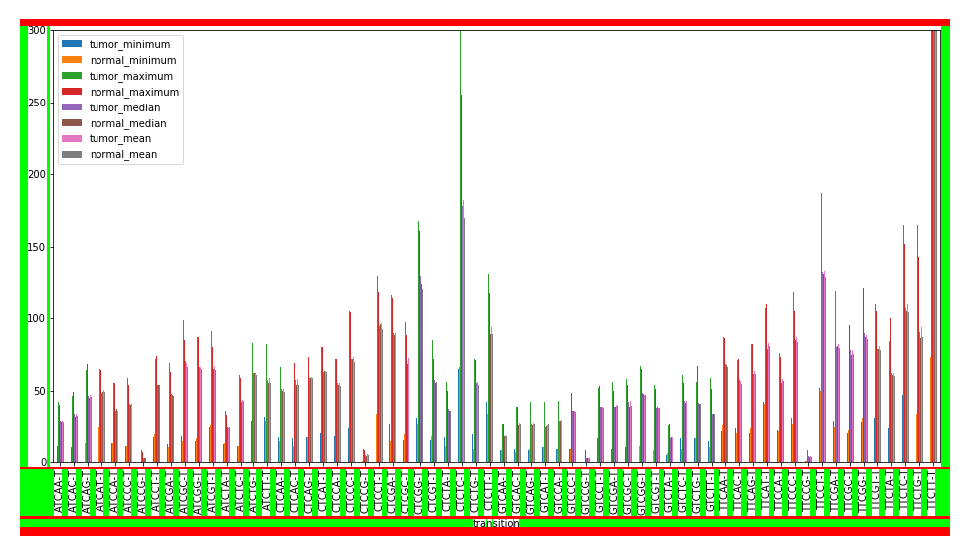

In [15]:
plt.figure(dpi=200)
plt.imshow(example_figure)
plt.axis('off')